In [1]:
#easiest option is using a library...assuming it works...it doesn't?
# from statsmodels.distributions.empirical_distribution import ECDF

def edf_calc(data):
    #following: https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)


import matplotlib.pyplot as plt
def implot(data, w, wcscond, vmax_p):
    fig = plt.figure()
    
    if  wcscond == True:
        fig.add_subplot(111, projection=w)
    else:
        fig.add_subplot(111)
    
    #for christmas turn on GnRd
    #plt.cm.get_cmap('Blues', 6) is another option
    #can also use RdBu...
    #otherwise just use plt.cm.viridis b/c it works
    plt.imshow(data, origin='lower', cmap=plt.cm.viridis, vmin =0, vmax=vmax_p)
    plt.xlabel('RA')
    plt.ylabel('Dec')

SystemExit: 

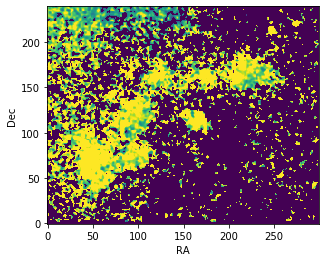

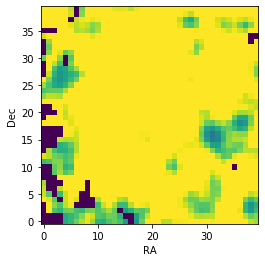

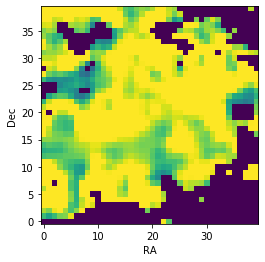

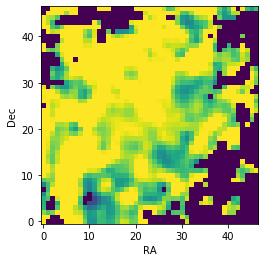

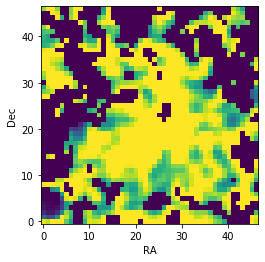

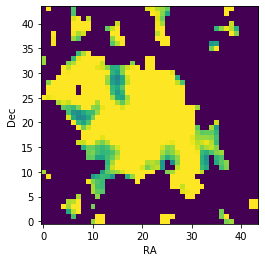

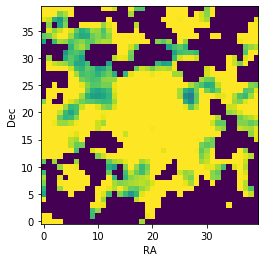

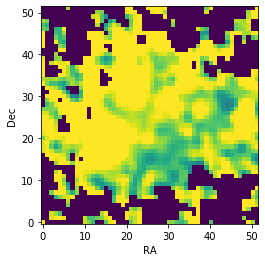

In [3]:
#trying to find cutout for each knot...
#only saving the fits files

import glob
# filenames = glob.glob('../../Convolved_Images_Hub/*126_image*')
# print(filenames)

#handling image ^@^@^@^@data
import sys
import numpy as np
from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D

file = 'regrid_hub_longexp_1.26_to_1.64_0.0_ston_0.8.fits'

hdu1 = fits.open(file)  #import image
w = wcs.WCS(hdu1[0].header)   #get wcs coords
data = hdu1[0].data
hdu1.close()

#plotting
implot(data, w, False, 1)  
#     sys.exit()

#knots 1 ... 7
coords_list = [[(50., 65.), (40, 40)], 
              [(97, 75), (40, 40)],
              [(100, 119), (47, 47)],
              [(120, 167), (47, 47)],
              [(167, 115), (44, 44)],
              [(175, 163), (40, 40)],
              [(220, 167), (52, 52)],
              ]

for i in range(len(coords_list)):
    #unpacking coords
    position = coords_list[i][0]
    size = coords_list[i][1]
               
    #cutting out coordinates
    cutout = Cutout2D(data, position, size, wcs = w)
    datacut = cutout.data
    wcscut = cutout.wcs

    #plotting image
    implot(datacut, wcscut, False, 1) 
    plt.savefig('knot_'+str(i+1))
    
sys.exit()



SystemExit: 

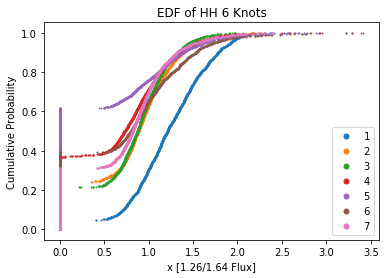

In [5]:
#trying to find cutout for each knot...
#only saving the fits files

import glob
# filenames = glob.glob('../../Convolved_Images_Hub/*126_image*')
# print(filenames)

#handling image ^@^@^@^@data
import sys
import numpy as np
from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D

file = 'regrid_hub_longexp_1.26_to_1.64_0.0_ston_0.8.fits'

hdu1 = fits.open(file)  #import image
w = wcs.WCS(hdu1[0].header)   #get wcs coords
data = hdu1[0].data
hdu1.close()


#initial guesses for cutout coords of scattered light

#knots 1 ... 7
coords_list = [[(50., 65.), (40, 40)], 
              [(97, 75), (40, 40)],
              [(100, 119), (47, 47)],
              [(120, 167), (47, 47)],
              [(167, 115), (44, 44)],
              [(175, 163), (40, 40)],
              [(220, 167), (52, 52)],
              ]

for i in range(len(coords_list)):
    #unpacking coords
    position = coords_list[i][0]
    size = coords_list[i][1]
               
    #cutting out coordinates
    cutout = Cutout2D(data, position, size, wcs = w)
    datacut = cutout.data
    wcscut = cutout.wcs
    
#     flatting data and plotting EDF
    flat_data = datacut.flatten()
    xedf, yedf = edf_calc(flat_data)
    plt.scatter(xedf, yedf, label = str(i+1), s = 1)

plt.title('EDF of HH 6 Knots')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('Cumulative Probability')
plt.legend(loc='best', markerscale=5)

sys.exit()



knee:  1.8552021638435836
count:  200.0
0:  [194]
0:  2.376627424863289
chosen root:  2.376627424863289
knee:  1.5949992858008821
count:  200.0
0:  [196]
0:  2.240420368805454
chosen root:  2.240420368805454
knee:  1.6354191577648045
count:  309.0
0:  [307]
0:  2.574378674663291
chosen root:  2.574378674663291
knee:  1.6585240631372518
count:  309.0
0:  [307]
0:  2.9271488349132198
chosen root:  2.7874149472048373
knee:  1.7360633359903375
count:  136.0
0:  [123]
0:  2.3521014359667047
chosen root:  2.950566009664173
knee:  1.881429102558623
count:  200.0
0:  [187]
0:  2.59594132348808
chosen root:  3.288854251624315
knee:  1.5431200057350107
count:  304.0
0:  [302]
0:  2.399211839180176
chosen root:  2.45


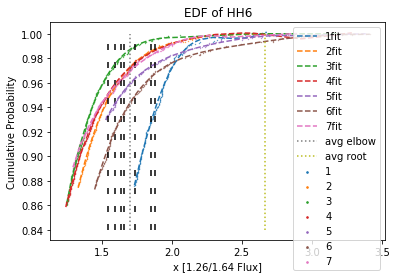

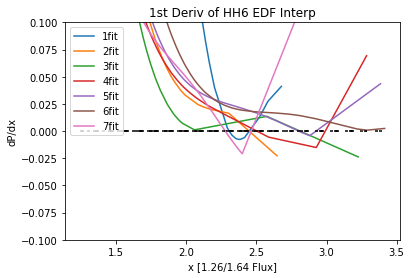

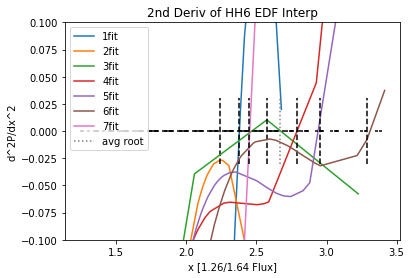

In [77]:
from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D
from kneed import KneeLocator
import numpy as np
import pandas as pd
import sys
from scipy.interpolate import UnivariateSpline

#formatting figures
plt.figure(111)
plt.title('EDF of HH6')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('Cumulative Probability')
# plt.xlim(0.5,3.5)
# plt.ylim(0,1.1)

plt.figure(112)
plt.title('1st Deriv of HH6 EDF Interp')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('dP/dx')
# plt.xlim(0.5,3.5)
plt.ylim(-0.1,0.1)


plt.figure(113)
plt.title('2nd Deriv of HH6 EDF Interp')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('d^2P/dx^2')
# plt.xlim(0.5,3.5)
plt.ylim(-0.1,0.1)


file = 'regrid_hub_longexp_1.26_to_1.64_0.0_ston_0.8.fits'

hdu1 = fits.open(file)  #import image
w = wcs.WCS(hdu1[0].header)   #get wcs coords
data = hdu1[0].data
hdu1.close()



coords_list = [[(50., 65.), (40, 40)], 
              [(97, 75), (40, 40)],
              [(100, 119), (47, 47)],
              [(120, 167), (47, 47)],
              [(167, 115), (44, 44)],
              [(175, 163), (40, 40)],
              [(220, 167), (52, 52)],
              ]


for i in range(len(coords_list)):
    #unpacking coords
    position = coords_list[i][0]
    size = coords_list[i][1]
               
    #cutting out coordinates
    cutout = Cutout2D(data, position, size, wcs = w)
    datacut = cutout.data
    wcscut = cutout.wcs

#     flatting data and plotting EDF
    flat_data = datacut.flatten()
    xedf, yedf = edf_calc(flat_data)
    
    af = int(1e6)
    a0 = int(1.4e3)
    if i == 4:
        a0 = int(1.8e3)
    elif i == 3:
        a0 = int(1.9e3)
    elif i == 2:
        a0 = int(1.9e3)
    elif i == 6:
        a0 = int(2.4e3)
        
    
    plt.figure(111)
    plt.scatter(xedf[a0:af], yedf[a0:af], label =  str(i+1), s = 0.1)
    
    
    #trying kneed - elbow point finder package
    kn = KneeLocator(xedf[a0:af], yedf[a0:af], curve='concave', direction='increasing')
    print('knee: ', kn.knee)
    
    
    #producing smaller list of values that can be fit with a function
    arr = np.array([xedf[a0:af], yedf[a0:af]])
#     arrx_uni = np.unique(arr, axis=1)
#     arr_nodup = np.unique(arrx_uni, axis=1)
    
    arrx_lim = np.array([i for i in arr[0] if i < 3.5])
    arry_lim = arr[1][:len(arrx_lim)]
    
    #creating smooth curve
    dim = 5
    pfit = np.polyfit(arrx_lim, arry_lim, dim)
    f = np.poly1d(pfit)
    plt.plot(arrx_lim, f(arrx_lim), linestyle='--', label= str(i+1)+'fit')
    plt.plot([kn.knee, kn.knee], [0.84,1], color='black', linestyle='--', dashes=(4, 8))
    
    #plotting derivative to find turning point...
    plt.figure(112)
    deriv_f = np.polyder(f)
    plt.plot(arrx_lim, deriv_f(arrx_lim), label= str(i+1)+'fit')
    plt.plot(arrx_lim, [0]*arrx_lim, color = 'black', linestyle='--', dashes=(2, 8))
    
    plt.figure(113)
    deriv2_f = np.polyder(deriv_f)
    plt.plot(arrx_lim, deriv2_f(arrx_lim), label= str(i+1)+'fit')
    plt.plot(arrx_lim, [0]*arrx_lim, color = 'black', linestyle='--', dashes=(2, 8))

    
        #finding min values of derivs...figuring out where 0 reddening ratio is
#     setted_list = deriv_f(arrx_lim)
    setted_list = deriv2_f(arrx_lim)
    minimum = float("inf")

    value_chosen = 0.
    count = 0.
    for val in setted_list:
        count += 1
        if abs(val - value_chosen) < minimum and count < 800:
            final_value = val
            minimum = abs(val - value_chosen)
    
    print('count: ', count)
    print('0: ', [np.where(setted_list == final_value)[0][0]])
    print('0: ', arrx_lim[np.where(setted_list == final_value)[0][0]])

    #settling on chosen spot confirming with approx location from graph
    if i == 0:
#         print(arrx_lim[98])
        avg  = arrx_lim[np.where(setted_list == final_value)[0][0]]
        print('chosen root: ', avg)
        plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')

    elif i == 1: 
#         print(arrx_lim[193])
        avg  = arrx_lim[np.where(setted_list == final_value)[0][0]]
        print('chosen root: ', avg)
        plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')
    elif i == 2: 
#         print(np.mean(np.array([arrx_lim[98], arrx_lim[99]])))
        avg  = arrx_lim[np.where(setted_list == final_value)[0][0]]
        print('chosen root: ', avg)
        plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')

    elif i == 3: 
        avg = np.mean([arrx_lim[-2], arrx_lim[-3]]) + 0.03
        print('chosen root: ', avg)
#         avg  = arrx_lim[np.where(setted_list == final_value)[0][0]]
        plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')
        
    elif i == 4: 
        avg = arrx_lim[-2] + 0.07
        print('chosen root: ', avg)
        plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')
        
    elif i == 5: 
#         print(setted_list)
        avg = arrx_lim[-2]
        print('chosen root: ', avg)
#         avg  = arrx_lim[np.where(setted_list == final_value)[0][0]]
        plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')
        
    else: 
        avg = 2.45 #arrx_lim[-2]
        print('chosen root: ', avg)
        plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')
    
    
    
#defining legends
plt.figure(111)
plt.plot([1.701, 1.701], [0.84,1], label ='avg elbow', linestyle=':')
plt.plot([2.667, 2.667], [0.84,1], label ='avg root', linestyle=':')

plt.legend(loc='best', markerscale = 5)
# plt.savefig('../EDFs/HH6EDF.png')
plt.savefig('../EDFs/HH6elbow.png')

plt.figure(112)
plt.legend(loc='upper left', markerscale = 5)
plt.savefig('../EDFs/HH6deriv.png')

plt.figure(113)
plt.plot([2.667, 2.667], [-0.03, 0.03], label ='avg root', linestyle=':')
plt.legend(loc='upper left', markerscale = 5)
plt.savefig('../EDFs/HH6deriv2.png')

In [40]:
#low epsilons

filenames = glob.glob('regrid*.fits')[0:-4]
print(filenames)

#handling image data
import sys

from astropy.io import fits
from astropy import wcs


for file in filenames:
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data    #grab data
    hdu1.close()
    
    #knot 1
#   position = (50., 65.)
#   size = (40, 40)
    
    #knot 2
#     position = (97, 75)
#     size = (40, 40)

    #knot 3
#     position = (100, 119)
#     size = (47, 47)

    #knot 4
    position = (120, 167)
    size = (47, 47)
    
        #knot 5
#     position = (167, 115)
#     size = (44, 44)

        #knot 6
#     position = (175, 163)
#     size = (40, 40)

#         #knot 7
#     position = (220, 167)
#     size = (52, 52)
    
    cutout = Cutout2D(data, position, size, wcs = w)
    
#     datacut = data[120:170, 500:610].flatten()  #couldn't get cutout2d working...narrowed in on pixels by hand...should be the same regardless, though
    plt.hist(cutout.data.flatten(), bins=400, histtype='step', label='eps='+file[-18:-14])
plt.legend()

plt.xlim(0, 4)
#     plt.ylim(0, 600)
plt.xlabel('Flux Ratio')
plt.ylabel('Counts')


plt.savefig('knot4/loweps.png')  #import image


NameError: name 'glob' is not defined